In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("abalone.csv")
df=pd.DataFrame(data)
df

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df["Age"]=[x+1.5 for x in df["Rings"]]
df

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


EDA PROCESS

In [6]:
df.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [7]:
df.isnull().sum()

Gender            0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

In [8]:
df.dtypes

Gender             object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Age               float64
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"].astype(str))

In [10]:
df

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [11]:
df.describe()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


<AxesSubplot:xlabel='Height'>

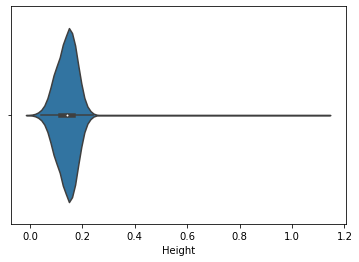

In [12]:
sns.violinplot(x="Height",data=df,bins=10)    

<AxesSubplot:xlabel='Height', ylabel='Count'>

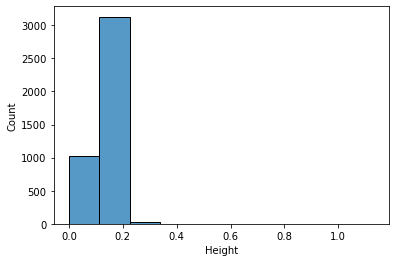

In [13]:
sns.histplot(x="Height",data=df,bins=10)

<AxesSubplot:xlabel='Rings', ylabel='Height'>

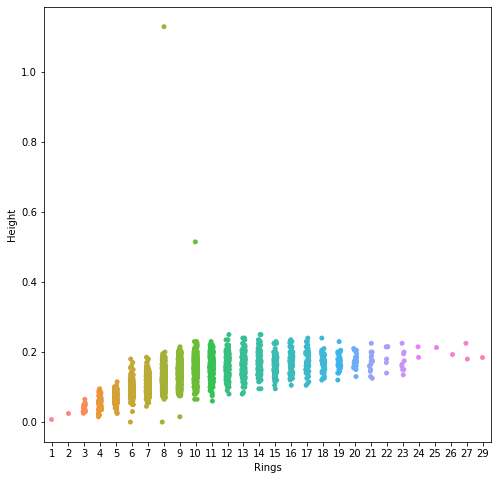

In [14]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Rings",y="Height",data=df)

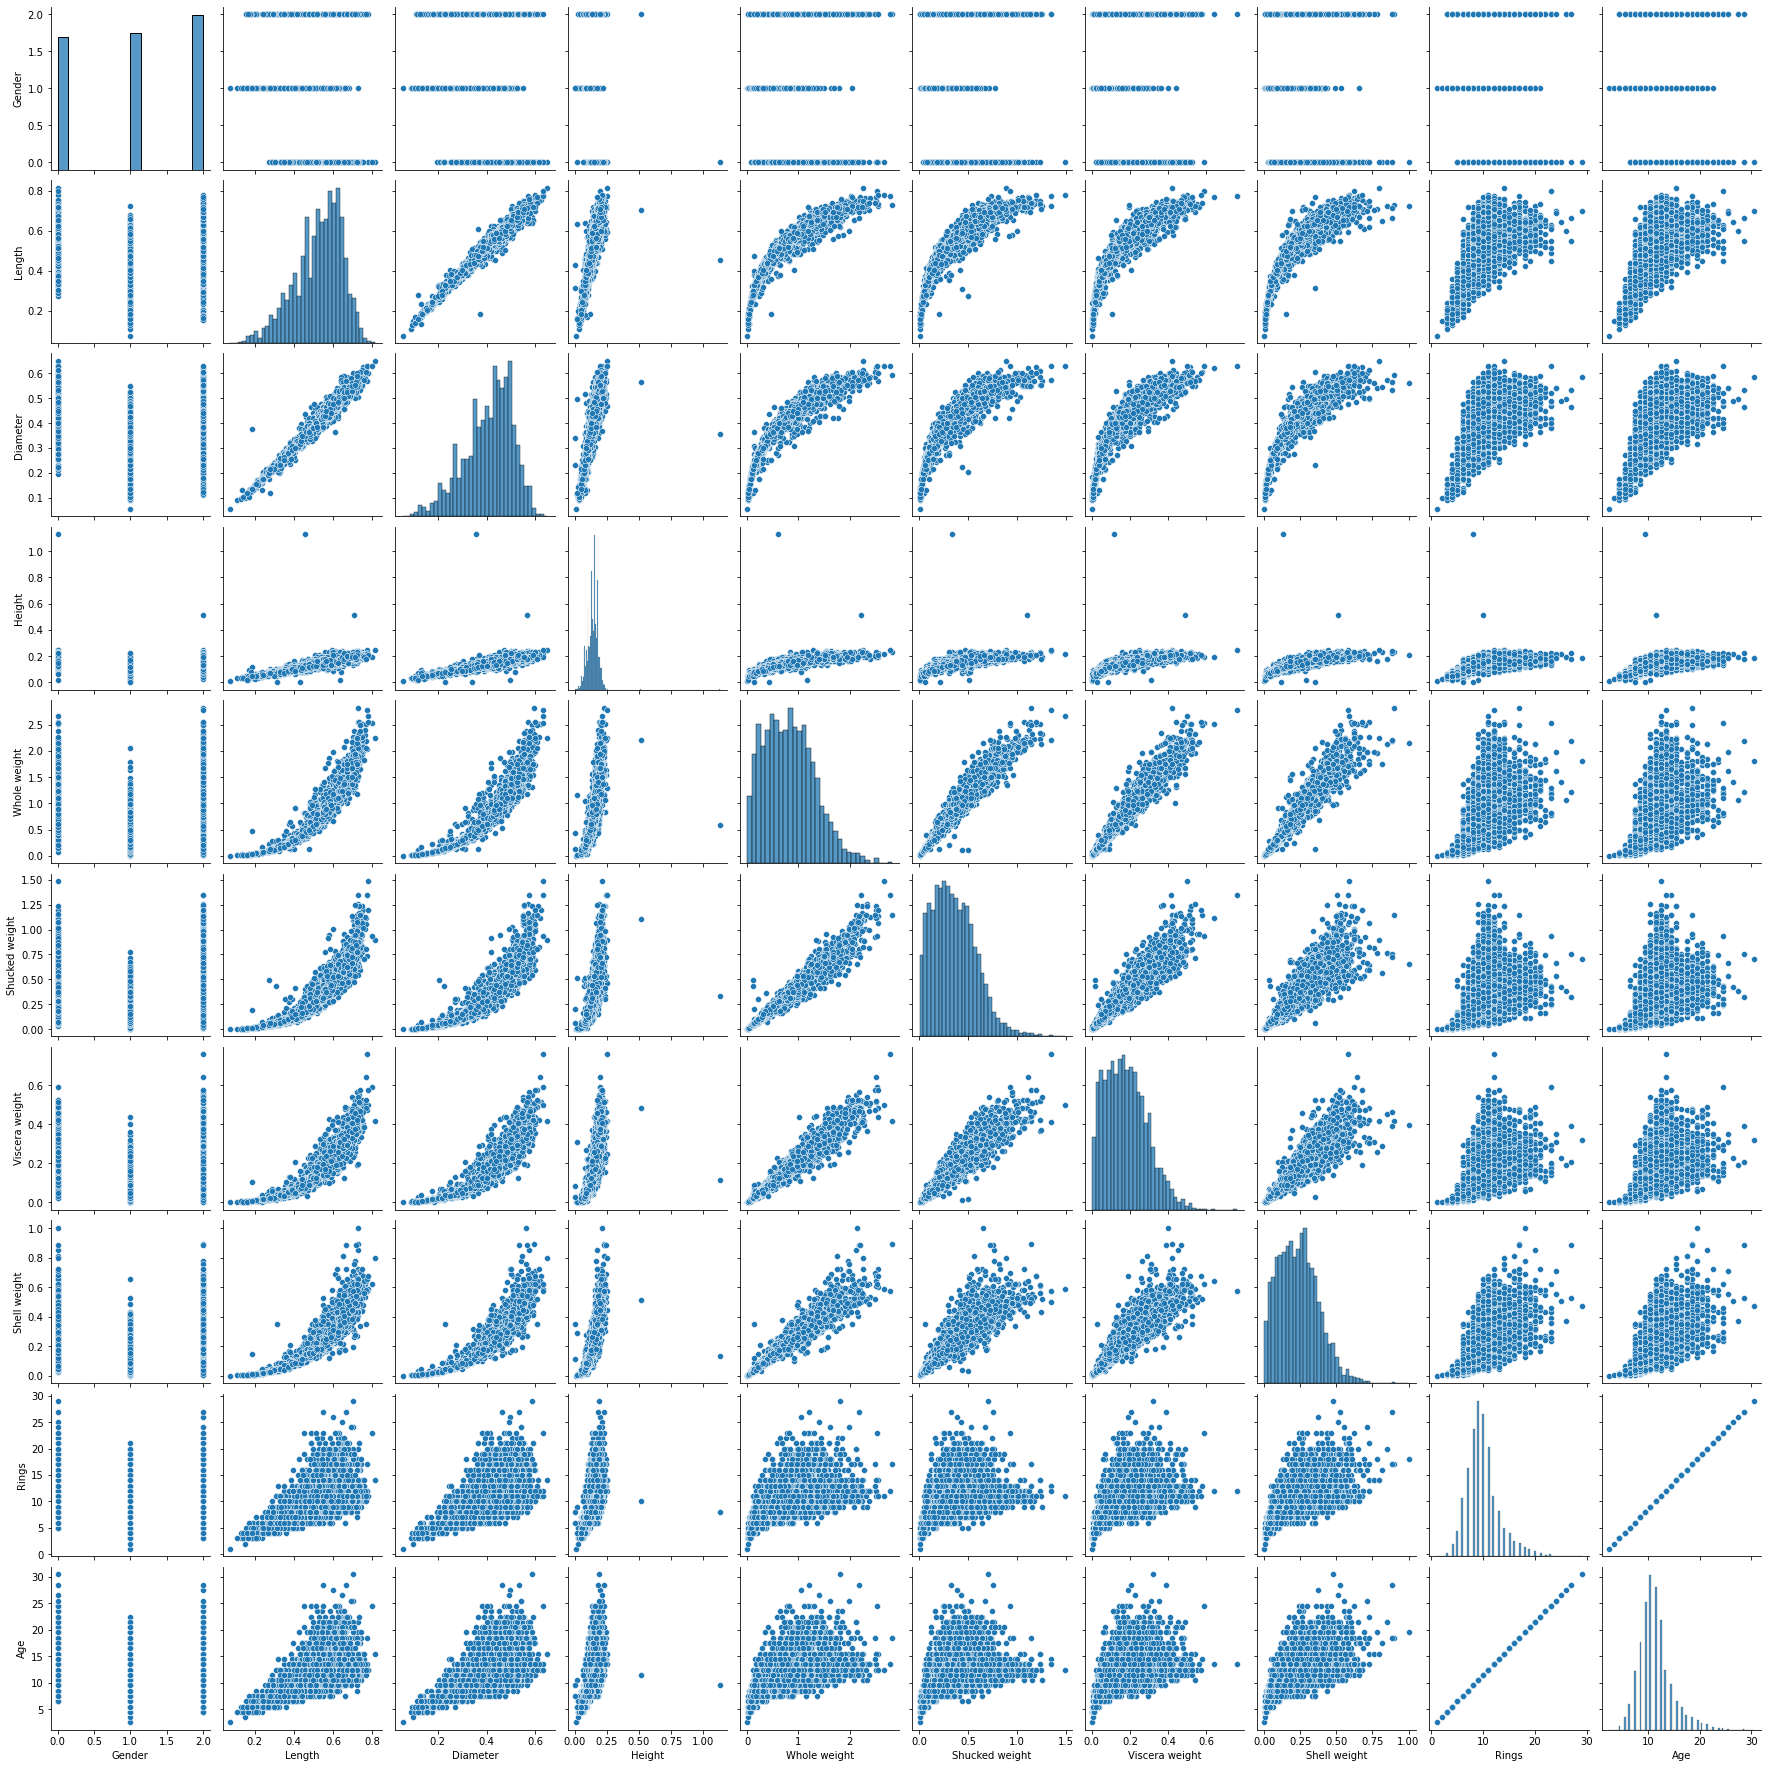

In [46]:
sns.pairplot(df)

In [15]:
df.skew()

Gender           -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

Gender               AxesSubplot(0.125,0.749828;0.133621x0.130172)
Length            AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Diameter           AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Height            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Whole weight      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Shucked weight       AxesSubplot(0.125,0.593621;0.133621x0.130172)
Viscera weight    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Shell weight       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Rings             AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Age               AxesSubplot(0.766379,0.593621;0.133621x0.130172)
dtype: object

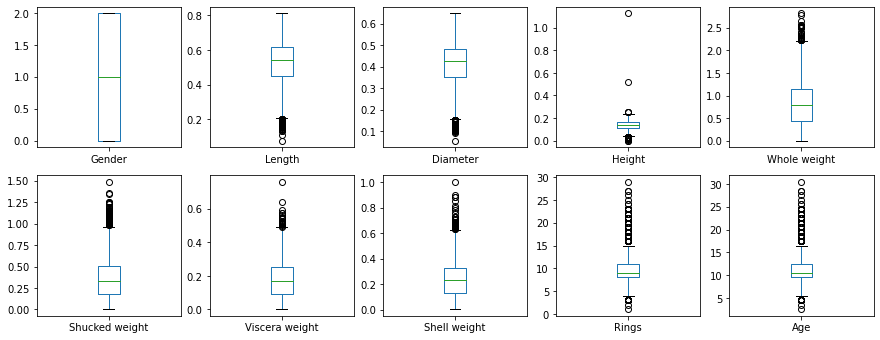

In [16]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

USING Z-SCORE METHOD TO REMOVE THE OUTLIERS

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.63821689, 1.57154357,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.21298732, 0.91001299,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.20713907, 0.28962385,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.49695471, 0.28962385,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.41073914, 0.02057072,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.84048058, 0.64095986,
        0.64095986]])

In [18]:
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [19]:
df.shape

(4177, 10)

In [20]:
4027/4177

0.9640890591333493

thus less than 4% data is removed by using z-score.so,the actual data is not much affected

In [21]:
df_new.skew()

Gender           -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.725464
dtype: float64

Now there is not much skewness in the dataset 

<AxesSubplot:>

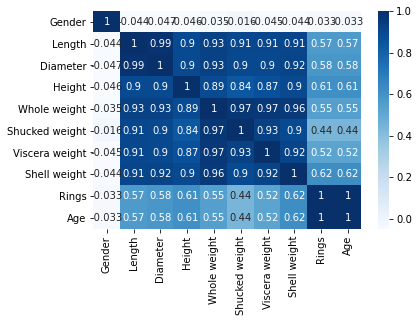

In [22]:
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")

as correlation is good for all labels we can also check for vif factor

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df_new.iloc[:,:-1]
x

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [24]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [25]:
calc_vif(x)

,variable,VIF factor
0,Gender,2.593801
1,Length,712.090638
2,Diameter,769.316084
3,Height,95.886537
4,Whole weight,452.654855
5,Shucked weight,123.306368
6,Viscera weight,66.409741
7,Shell weight,95.213440
8,Rings,25.293845


comparing correlation and vif(multicollinearity) factor we can drop columns

as both the correlation and vif factor of the columns length and shucked weight is not good it is dropped

In [26]:
df_new.drop(["Length","Shucked weight"],axis=1,inplace=True) 

In [27]:
df_new

,Gender,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings,Age
0,2,0.365,0.095,0.5140,0.1010,0.1500,15,16.5
1,2,0.265,0.090,0.2255,0.0485,0.0700,7,8.5
2,0,0.420,0.135,0.6770,0.1415,0.2100,9,10.5
3,2,0.365,0.125,0.5160,0.1140,0.1550,10,11.5
4,1,0.255,0.080,0.2050,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11,12.5
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10,11.5
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9,10.5
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10,11.5


In [28]:
x=df_new.iloc[:,:-1]
x

,Gender,Diameter,Height,Whole weight,Viscera weight,Shell weight,Rings
0,2,0.365,0.095,0.5140,0.1010,0.1500,15
1,2,0.265,0.090,0.2255,0.0485,0.0700,7
2,0,0.420,0.135,0.6770,0.1415,0.2100,9
3,2,0.365,0.125,0.5160,0.1140,0.1550,10
4,1,0.255,0.080,0.2050,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,0,0.450,0.165,0.8870,0.2390,0.2490,11
4173,2,0.440,0.135,0.9660,0.2145,0.2605,10
4174,2,0.475,0.205,1.1760,0.2875,0.3080,9
4175,0,0.485,0.150,1.0945,0.2610,0.2960,10


In [29]:
calc_vif(x)

,variable,VIF factor
0,Gender,2.571233
1,Diameter,94.323829
2,Height,93.891767
3,Whole weight,141.387848
4,Viscera weight,61.187043
5,Shell weight,68.029867
6,Rings,22.246562


In [30]:
from sklearn.preprocessing import StandardScaler          #making all column_data into a single scale
scale=StandardScaler()                                    #makes mean=0,std=1 thus model can learn more efficiently
x=scale.fit_transform(x)
x.shape

(4027, 7)

In [31]:
y=df_new.iloc[:,-1]
y.shape

(4027,)

MACHINE LEARNING PROCESS

In [32]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=DecisionTreeRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 1.0 on random state 1


In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [34]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 1.0
training score 1.0
error= 2.0549739489855872e-15 

testing score= 1.0
training score 1.0
error= 0.0 

testing score= 0.9980197819564233
training score 0.9979247112613613
error= 0.12499307036993756 

testing score= 0.9999999581710602
training score 0.9999999829229077
error= 0.0005751973085430385 

testing score= 0.9844037343418768
training score 0.9903446119963271
error= 0.3371657276092519 



In [35]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std())

score= [1. 1. 1. 1. 1.]
mean_score= 1.0
std= 0.0
score= [1. 1. 1. 1. 1.]
mean_score= 1.0
std= 0.0
score= [0.9951062  0.9962438  0.995034   0.99835448 0.99843735]
mean_score= 0.9966351678161891
std= 0.0015005705621682099
score= [1.         1.         1.         0.99999998 1.        ]
mean_score= 0.9999999965331415
std= 6.933716667489876e-09
score= [0.98302552 0.97255066 0.98135483 0.98718649 0.98528088]
mean_score= 0.9818796756146855
std= 0.005066546147034889


we choose DecisionTreeRegressor as both the crossval score and actual accuracy is good

In [36]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameters={"criterion":["squared_error", "mse", "friedman_mse", "absolute_error", "mae", "poisson"],"splitter":["best","random"],"max_depth": np.arange(2,10), "max_features": ["auto","sqrt","log2"]}

In [40]:
gcv=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)

In [41]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'friedman_mse',
                                       'absolute_error', 'mae', 'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [42]:
gcv.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'splitter': 'best'}

In [43]:
final_model=DecisionTreeRegressor(criterion="mse",max_depth=5,max_features="auto",splitter="best")
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

1.0
score= 1.0
0.0


In [44]:
import joblib

joblib.dump(final_model,"abalonefile.obj")

['abalonefile.obj']

In [45]:
abalonefile_from_joblib=joblib.load("abalonefile.obj")
abalonefile_from_joblib.predict(x_test)

array([13.5,  9.5, 10.5, ..., 18.5, 11.5, 11.5])